In [39]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [40]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [41]:
X_test.shape

(10000, 32, 32, 3)

In [42]:
y_train.shape

(50000, 1)

In [43]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [44]:
y_train = y_train.reshape(-1,)

In [45]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [46]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

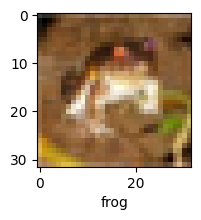

In [47]:
def plot_samples(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

plot_samples(X_train,y_train, 0)    

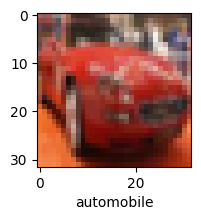

In [48]:

plot_samples(X_train,y_train, 5) 

In [49]:
X_train = X_train / 255
X_test = X_test / 255

#without CNN

In [50]:
model = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])

model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train,y_train, epochs=50)

Epoch 1/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.8558 - accuracy: 0.3355
Epoch 2/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6528 - accuracy: 0.4133
Epoch 3/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5690 - accuracy: 0.4436
Epoch 4/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5069 - accuracy: 0.4665
Epoch 5/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4553 - accuracy: 0.4857
Epoch 6/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4130 - accuracy: 0.5031
Epoch 7/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3721 - accuracy: 0.5150
Epoch 8/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.3405 - accuracy: 0.5264
Epoch 9/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.3068 - accuracy: 0.5420
Epoch 10/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1

In [51]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.6860 - accuracy: 0.5465


[1.6860381364822388, 0.546500027179718]

In [52]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("classification report : \n", classification_report(y_test,y_pred_classes))

classification report : 
               precision    recall  f1-score   support

           0       0.64      0.64      0.64      1000
           1       0.70      0.69      0.69      1000
           2       0.54      0.36      0.43      1000
           3       0.28      0.77      0.41      1000
           4       0.56      0.46      0.51      1000
           5       0.66      0.19      0.30      1000
           6       0.67      0.54      0.60      1000
           7       0.72      0.54      0.62      1000
           8       0.67      0.71      0.69      1000
           9       0.67      0.56      0.61      1000

    accuracy                           0.55     10000
   macro avg       0.61      0.55      0.55     10000
weighted avg       0.61      0.55      0.55     10000



#USing CNN

In [57]:
CNN = models.Sequential([
    # CNN
    layers.Conv2D(filters = 32 , kernel_size=(3,3) ,activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters = 64 , kernel_size=(3,3) ,activation='relu'),
    layers.MaxPooling2D((2,2)),


    # dense
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])


In [58]:

CNN.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [59]:
CNN.fit(X_train,y_train, epochs=50)

Epoch 1/50
1563/1563 [==============================] - 12s 8ms/step - loss: 1.4510 - accuracy: 0.4821
Epoch 2/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1016 - accuracy: 0.6154
Epoch 3/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9798 - accuracy: 0.6567
Epoch 4/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8972 - accuracy: 0.6863
Epoch 5/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8326 - accuracy: 0.7112
Epoch 6/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7724 - accuracy: 0.7313
Epoch 7/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7294 - accuracy: 0.7443
Epoch 8/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6816 - accuracy: 0.7609
Epoch 9/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6446 - accuracy: 0.7760
Epoch 10/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.60

In [62]:
y_test = y_test.reshape(-1,)
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [63]:
CNN.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 3.1746 - accuracy: 0.6541


[3.1745755672454834, 0.6541000008583069]

In [65]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = CNN.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("classification report : \n", classification_report(y_test,y_pred_classes))

classification report : 
               precision    recall  f1-score   support

           0       0.66      0.73      0.69      1000
           1       0.79      0.79      0.79      1000
           2       0.54      0.54      0.54      1000
           3       0.44      0.48      0.46      1000
           4       0.62      0.59      0.60      1000
           5       0.55      0.53      0.54      1000
           6       0.70      0.74      0.72      1000
           7       0.73      0.68      0.70      1000
           8       0.78      0.75      0.76      1000
           9       0.78      0.72      0.75      1000

    accuracy                           0.65     10000
   macro avg       0.66      0.65      0.66     10000
weighted avg       0.66      0.65      0.66     10000

